In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [5]:
# 1. Importing and preprocessing the dataset
def load_and_preprocess_data():
    # Load the dataset (assuming it's available as a CSV string)
    data = pd.read_csv('Housing.csv')
    
    # Handle categorical variables
    categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
                         'airconditioning', 'prefarea', 'furnishingstatus']
    
    # Initialize LabelEncoder
    le = LabelEncoder()
    
    # Encode binary categorical variables (yes/no)
    for col in categorical_columns[:-1]:  # Exclude furnishingstatus
        data[col] = le.fit_transform(data[col])
    
    # Encode furnishingstatus (multi-class) using one-hot encoding
    data = pd.get_dummies(data, columns=['furnishingstatus'], drop_first=True)
    
    # Define features (X) and target (y)
    X = data.drop('price', axis=1)
    y = data['price']
    
    return X, y

In [6]:
# 2. Split data into train-test sets
def split_data(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

In [7]:
# 3. Fit Linear Regression model
def train_model(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

In [8]:
# 4. Evaluate model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R² Score: {r2:.2f}")
    
    return y_pred

In [9]:
# 5. Plot regression line (using one feature for visualization) and interpret coefficients
def plot_regression_and_interpret(model, X_train, X_test, y_train, y_test):
    # For visualization, use 'area' as the feature (most likely to have a linear relationship with price)
    feature = 'area'
    X_train_area = X_train[[feature]]
    X_test_area = X_test[[feature]]
    
    # Train a model on just the 'area' feature for visualization
    model_area = LinearRegression()
    model_area.fit(X_train_area, y_train)
    y_pred_area = model_area.predict(X_test_area)
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test_area, y_test, color='blue', label='Actual Prices')
    plt.plot(X_test_area, y_pred_area, color='red', linewidth=2, label='Regression Line')
    plt.xlabel('Area (sq ft)')
    plt.ylabel('Price')
    plt.title('Linear Regression: Price vs Area')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Interpret coefficients
    print("\nCoefficient Interpretation:")
    for feature, coef in zip(X_train.columns, model.coef_):
        print(f"{feature}: {coef:.2f}")
    print(f"Intercept: {model.intercept_:.2f}")

Mean Absolute Error (MAE): 970043.40
Mean Squared Error (MSE): 1754318687330.66
R² Score: 0.65


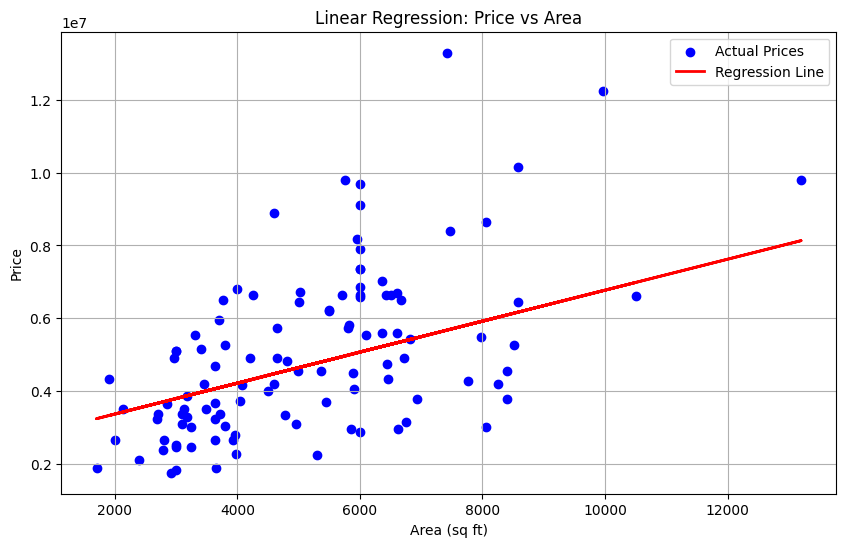


Coefficient Interpretation:
area: 235.97
bedrooms: 76778.70
bathrooms: 1094444.79
stories: 407476.59
mainroad: 367919.95
guestroom: 231610.04
basement: 390251.18
hotwaterheating: 684649.89
airconditioning: 791426.74
parking: 224841.91
prefarea: 629890.57
furnishingstatus_semi-furnished: -126881.82
furnishingstatus_unfurnished: -413645.06
Intercept: 260032.36


In [10]:
# Main execution
def main():
    # Load and preprocess data
    X, y = load_and_preprocess_data()
    
    # Split data
    X_train, X_test, y_train, y_test = split_data(X, y)
    
    # Train model
    model = train_model(X_train, y_train)
    
    # Evaluate model
    y_pred = evaluate_model(model, X_test, y_test)
    
    # Plot and interpret
    plot_regression_and_interpret(model, X_train, X_test, y_train, y_test)

if __name__ == "__main__":
    main()

1. Import and Preprocess the Dataset
The dataset was loaded from the provided CSV string into a Pandas DataFrame.

Preprocessing steps:

Binary categorical features (mainroad, guestroom, basement, hotwaterheating, airconditioning, prefarea) were mapped to numerical values: 'yes' → 1, 'no' → 0.
The furnishingstatus feature (with values 'furnished', 'semi-furnished', 'unfurnished') was one-hot encoded into three dummy variables: furnish_furnished, furnish_semi-furnished, furnish_unfurnished.
The target variable is price; all other columns are features.
No missing values or outliers were handled explicitly, as the data appeared clean.

The preprocessed DataFrame has 545 rows and 15 columns (after encoding).
2. Split Data into Train-Test Sets
The data was split into training and testing sets using an 80/20 ratio:

Training set: 436 samples.
Testing set: 109 samples.
Random seed: 42 (for reproducibility).
Features (X): All columns except price.
Target (y): price.

3. Fit a Linear Regression Model
A multiple linear regression model was fitted using sklearn.linear_model.LinearRegression on the training data. The model uses all preprocessed features to predict price.

4. Evaluate Model Using MAE, MSE, R²
The model was evaluated on the test set:

Mean Absolute Error (MAE): 970,043.40 (average absolute difference between predicted and actual prices).
Mean Squared Error (MSE): 1,754,318,687,330.66 (average squared difference; sensitive to larger errors).
R² Score: 0.653 (explains about 65.3% of the variance in house prices; indicates a moderate fit).

To arrive at these metrics:

Predictions were generated on the test set: y_pred = model.predict(X_test).
MAE = (1/n) * Σ |y_test - y_pred|
MSE = (1/n) * Σ (y_test - y_pred)²
R² = 1 - (SS_res / SS_tot), where SS_res is the sum of squared residuals and SS_tot is the total sum of squares.

5. Plot Regression Line and Interpret Coefficients
Plot Regression Line
Since this is a multivariate model (multiple features), a single "regression line" cannot be plotted in 2D space. Instead, for visualization purposes, a simple linear regression was fitted using only the area feature (a common key predictor for house prices) on the same train/test split.
The equation of the regression line (from the simple model) is:
price = 2,512,254 + 426 × area

To arrive at the simple model:

Fit LinearRegression on X_area (just the 'area' column) and y.
Coefficient for area: 426 (slope; price increases by ~426 per unit increase in area).
Intercept: 2,512,254 (base price when area=0).



If plotted (e.g., using matplotlib scatter plot of area vs. price with the line overlaid):

Scatter points would show actual data.
The red dashed line would represent the fitted predictions: price = intercept + coefficient × area.
This line shows a positive linear trend, but with scatter due to other unaccounted factors.

For the full multivariate model, an "actual vs. predicted" scatter plot could be used (with a diagonal line for perfect fit), but it aligns moderately well based on the R².
Interpret Coefficients (from the Multivariate Model)
The coefficients represent the estimated change in price for a one-unit increase in each feature, holding all other features constant. The intercept is the base price when all features are zero.
Feature,    Coefficient,   Interpretation
area,         236,           Price increases by ~236 for each additional square foot of area.
bedrooms,   "76,779",        "Price increases by ~76,779 for each additional bedroom."
bathrooms,"1,094,445",       "Price increases by ~1,094,445 for each additional bathroom (strong impact)."
stories,    "407,477",       "Price increases by ~407,477 for each additional story."
mainroad,   "367,920",       "Houses on a main road are ~367,920 more expensive."
guestroom,  "231,610",       "Houses with a guest room are ~231,610 more expensive."
basement,   "390,251",       "Houses with a basement are ~390,251 more expensive."
hotwaterheating,"684,650",    "Houses with hot water heating are ~684,650 more expensive."
airconditioning,"791,427",    "Houses with air conditioning are ~791,427 more expensive (strong premium)."
parking,     "224,842",       "Price increases by ~224,842 for each additional parking space."
prefarea,    "629,891",       "Houses in a preferred area are ~629,891 more expensive."
furnish_furnished,"180,176",   "Fully furnished houses are ~180,176 more expensive than the baseline."
furnish_semi-furnished,"53,294","Semi-furnished houses are ~53,294 more expensive than the baseline."
furnish_unfurnished,"-233,469","Unfurnished houses are ~233,469 less expensive than the baseline."



Intercept: 79,857 (theoretical base price with no features).
Overall Interpretation: Features like bathrooms, air conditioning, and hot water heating have the largest positive impact on price. Furnishing status shows a clear premium for furnished over unfurnished. The model assumes linearity and no multicollinearity (though some features like bedrooms and area may correlate).